# Machine Learning with Keras: The Python Deep Learning library

Keras is a high level machine learning API, written in Python and runs on top of Tensorflow or Theano.
Packages like Keras and Tensorflow make it much easier and more efficient to build machine learning models.
This Notebook is a brief introduction to Keras, you can find the documentation [here.](https://keras.io/)

First you need to install Tansorflow on your local machine. Open a command prompt and run the following:

pip install --user tensorflow==1.12

pip install –-user keras

There is also a video of how to do this on Blackboard in the learning materials > python resources folder.

Once your environment is set up first load and process the data as before...

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Read data from csv
iris = pd.read_csv("data/Iris.csv")
print(iris.head())

# Replace the species with 1,2 or 3 as appropriate
iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# Get labels, flatten and encode to one-hot
columns = ['Species']
labels = pd.DataFrame(iris, columns=columns).to_numpy()
labels = labels.flatten()
labels = to_categorical(labels)

# Get Features
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
features = pd.DataFrame(iris, columns=columns).to_numpy()

# Split data to training and test data, 2/3 for training and 1/3 for testing
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.33, random_state=2)

   Id  SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa


Next we build the Keras model and we can train it with just one line of code...

**Note:** Keras doesn't seem to play nicely with the sigmoid activation function so we will use ReLu.

In [25]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras import optimizers

# Learning rate
learning_rate = 0.01

# Number of training epochs
num_epochs = 100

# Network architecture parameters
num_features = len(train_x[0])
num_classes = len(train_y[0])
num_hidden_nodes = 10

# With sequential we can just add layers to the network
model = Sequential()
model.add(Dense(num_hidden_nodes, input_dim=num_features, activation='relu'))
model.add(Dense(num_hidden_nodes, activation='relu'))
model.add(Dense(num_hidden_nodes, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

# The fit function returns a dictionary of the training and evaluation losses and accuracies
metrics = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=num_epochs, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_24 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 33        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples, validate on 50 samples
Epoch 1/100
 - 0s - loss: 1.3536 - acc: 0.3400 - val_loss: 1.3077 - val_acc: 0.3200
Epoch 2/100
 - 0s - loss: 1.2454 - acc: 0.3400 - val_loss: 1.1988 - val_acc: 0.3200
Epoch 3/100
 - 0s - loss: 1.1536 - acc: 0.3400 - val_loss: 1.09

Evaluate the model

If we had a 3rd evaluation set of unseen data we could evaluate it here.
Instead we will just use the same test set from before.

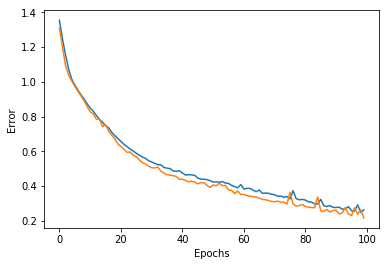

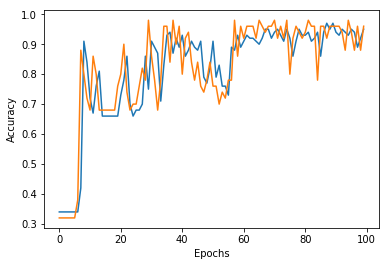

50/50 [==============================] - 0s 40us/step
Evaluation: Loss=0.217 Accuracy=0.96


In [26]:
# Plot the error chart
plt.plot(metrics.history['loss'])
plt.plot(metrics.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Plot the accuracy chart
plt.plot(metrics.history['acc'])
plt.plot(metrics.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

eval_metrics = model.evaluate(test_x, test_y)
print("Evaluation: Loss=" + str(round(eval_metrics[0], 3)) + " Accuracy=" + str(round(eval_metrics[1], 3)))
